# Brudnopis


## Analiza danych

In [135]:
# Import potrzebnych bibliotek 

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import danych
PATH_DATASET_train = r'PG_Dataset\train.csv'
PATH_DATASET_test = r'PG_Dataset\test.csv'

df_raw = pd.read_csv(PATH_DATASET_train, sep=',')
df_test = pd.read_csv(PATH_DATASET_test, sep=',')

In [136]:
def First_looking_on_feature(nameOfColumn):
    print(f'''Unique data:\n
    {nameOfColumn.unique()}''')
    print('-'*100)
    
    print('Histogram')
    plt.hist(nameOfColumn)
    plt.show()
    print('-'*100)
    
    print('Value counts\n')
    print(f'{nameOfColumn.value_counts()}')
    print('-'*100)
    
def Sns_count_plot(nameOfColumn):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=nameOfColumn, hue='booking_status', data=df_raw)
    plt.legend(['cancelled', 'honor'], loc='upper right')
    plt.show()

In [137]:
df_raw.columns # Wypisane nazwy kolumn

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [138]:
df_raw.dtypes # only numerical data 

id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [139]:
df_raw.isna().sum() # The dataset is complete without NaN

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [140]:
df_raw.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [141]:
df_raw.info() # the quick summary of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [142]:
df_raw.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [143]:
df_raw.shape

(42100, 19)

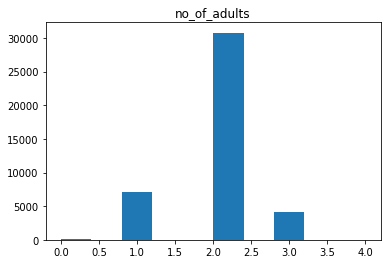

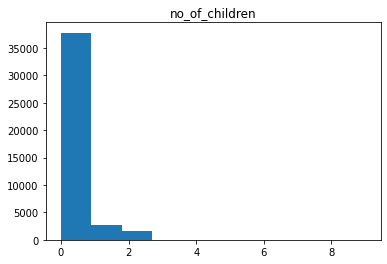

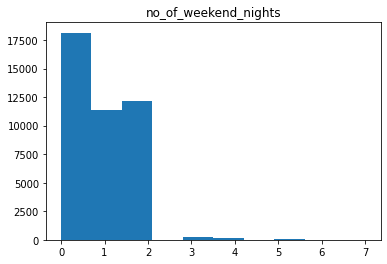

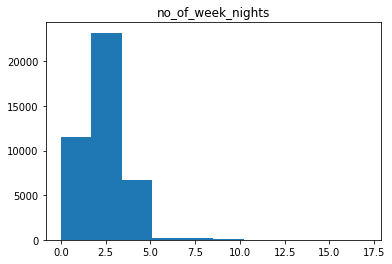

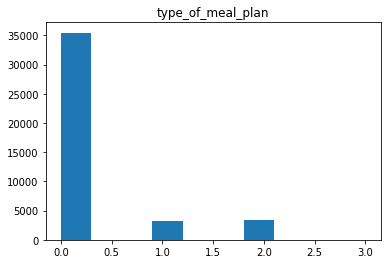

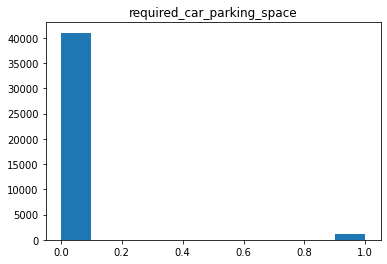

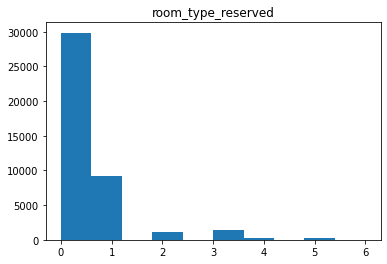

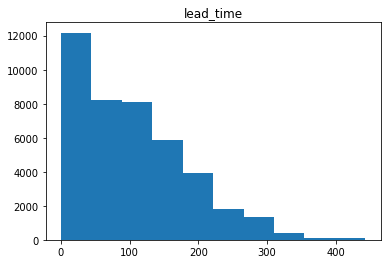

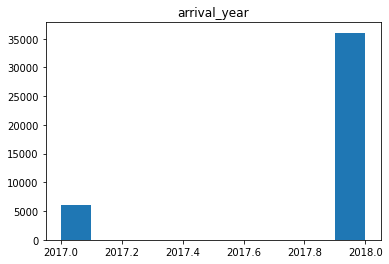

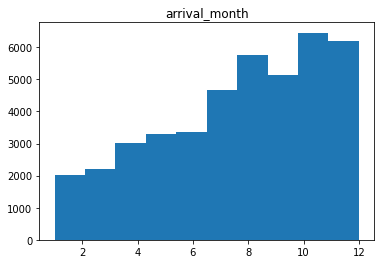

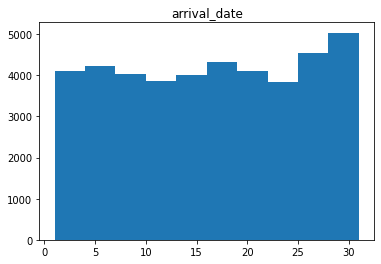

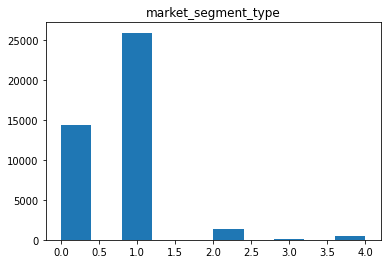

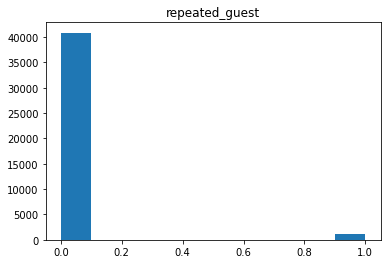

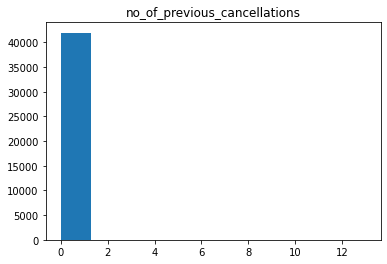

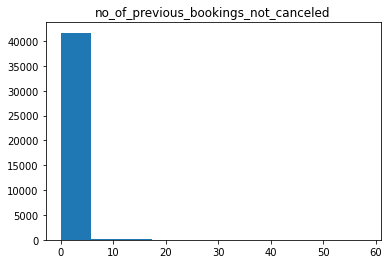

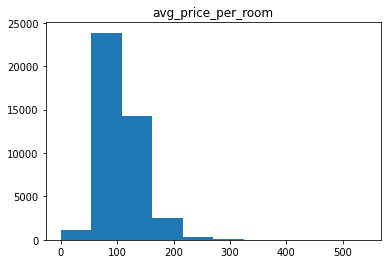

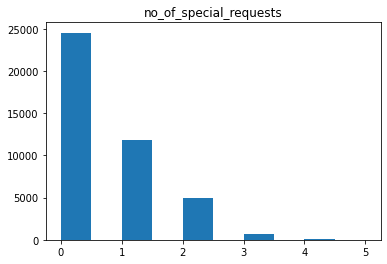

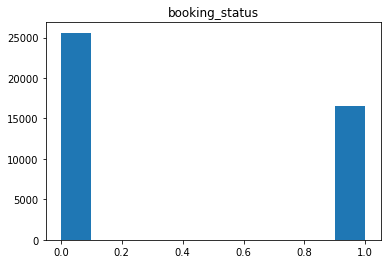

<Figure size 432x288 with 0 Axes>

In [144]:
for column in df_raw.columns.drop('id'):
#     print(column)
    plt.hist(df_raw[column])
    plt.title(f'{column}')
    plt.figure()
    plt.show

In [145]:
for column in df_raw.columns.drop('id'):
    print(f'Name of column: {column}')
    print(df_raw[column].unique())
    print('--'*30)
# df_raw['booking_status'].unique()

Name of column: no_of_adults
[2 1 0 3 4]
------------------------------------------------------------
Name of column: no_of_children
[0 2 1 3 4 9]
------------------------------------------------------------
Name of column: no_of_weekend_nights
[0 1 2 3 5 6 4 7]
------------------------------------------------------------
Name of column: no_of_week_nights
[ 2  1  0  5  3  4  7  6  8 10 11  9 12 15 17 13 16 14]
------------------------------------------------------------
Name of column: type_of_meal_plan
[1 0 2 3]
------------------------------------------------------------
Name of column: required_car_parking_space
[0 1]
------------------------------------------------------------
Name of column: room_type_reserved
[0 2 3 1 4 5 6]
------------------------------------------------------------
Name of column: lead_time
[  9 117 315  32 258 215 320 265 189 137   1  69  50 217  58 143 188 155
 109  84   7   0 184  11 224 182 179 111  49  61 317  66  41 139 207 161
  25 147 110 208 148 223  

In [146]:
print(len(df_raw['avg_price_per_room'].unique()))
print(f'''MIN: {min(df_raw['avg_price_per_room'])}\n
MAX: {max(df_raw['avg_price_per_room'])}''')

2286
MIN: 0.0

MAX: 540.0


In [147]:
df_raw[(df_raw['avg_price_per_room'] == 0) & (df_raw['booking_status'] == 1)]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1122,1122,2,0,0,0,0,0,0,256,2017,9,14,1,0,0,0,0.0,0,1
5527,5527,2,0,1,1,0,0,0,180,2018,5,2,1,0,0,0,0.0,1,1
6267,6267,2,0,0,2,0,0,0,256,2017,9,14,1,0,0,0,0.0,0,1
8598,8598,2,0,1,2,0,0,0,180,2017,10,16,1,0,0,0,0.0,0,1
8654,8654,1,0,0,2,2,0,0,320,2018,8,18,1,0,0,0,0.0,0,1
9755,9755,2,0,1,2,0,0,0,3,2017,11,6,1,0,0,0,0.0,0,1
14173,14173,2,0,1,0,2,0,0,6,2017,10,10,1,0,0,0,0.0,0,1
14710,14710,2,0,0,2,2,0,0,102,2017,10,16,1,0,0,0,0.0,0,1
14990,14990,1,0,0,2,2,0,0,1,2018,6,10,1,0,0,0,0.0,0,1
16167,16167,2,0,0,0,0,0,2,256,2017,10,7,1,0,0,0,0.0,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

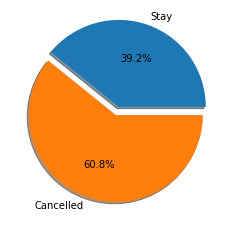

In [148]:
sizes = [df_raw.booking_status[df_raw['booking_status'] == 1].count(), df_raw.booking_status[df_raw['booking_status'] == 0].count()]
explode = (0.1, 0)
labels = 'Stay', 'Cancelled'
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show

In [149]:
for column in df_raw.columns.drop('id', 'booking_status'):
     # Dane mogą być niezabalansowane - konieczna weryfikacja 
    print('#'*30)
    print(f'{df_raw[column].value_counts()}\n')

##############################
2    30771
1     7089
3     4061
0      167
4       12
Name: no_of_adults, dtype: int64

##############################
0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64

##############################
0    18137
2    12143
1    11389
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64

##############################
2     12905
3     10286
1      9558
4      4175
5      2573
0      1937
6       237
7       160
8        84
10       82
9        53
11       16
15       11
12        9
13        5
16        4
14        3
17        2
Name: no_of_week_nights, dtype: int64

##############################
0    35463
2     3421
1     3210
3        6
Name: type_of_meal_plan, dtype: int64

##############################
0    41037
1     1063
Name: required_car_parking_space, dtype: int64

##############################
0    29853
1     9135
3     1465
2     1131
4      320

In [150]:
df_raw['arrival_entire_date'] = df_raw[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1)
df_raw_copy = df_raw.drop(index=df_raw[(df_raw['arrival_year']==2018) & (df_raw['arrival_month']==2) & (df_raw['arrival_date']==29)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==9) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==4) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==6) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==2) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==11) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==2) & (df_raw_copy['arrival_date']==30)]['arrival_year'].index)
df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2017) & (df_raw_copy['arrival_month']==9) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
# df_raw_copy
pd.to_datetime(df_raw_copy['arrival_entire_date'], format="%Y-%m-%d")

C:\Users\Amadeusz\AppData\Local\Temp\ipykernel_232\44432937.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==9) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
C:\Users\Amadeusz\AppData\Local\Temp\ipykernel_232\44432937.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==4) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
C:\Users\Amadeusz\AppData\Local\Temp\ipykernel_232\44432937.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_raw_copy = df_raw_copy.drop(index=df_raw_copy[(df_raw['arrival_year']==2018) & (df_raw_copy['arrival_month']==6) & (df_raw_copy['arrival_date']==31)]['arrival_year'].index)
C:\Users\Amadeusz\AppData\Local\Temp\ipy

0       2018-01-14
1       2018-07-29
2       2018-12-02
3       2018-12-01
4       2018-10-16
           ...    
42095   2018-12-30
42096   2017-09-23
42097   2018-07-21
42098   2018-11-09
42099   2017-10-26
Name: arrival_entire_date, Length: 42050, dtype: datetime64[ns]

In [151]:
df_raw_copy['arrival_entire_date'] = df_raw_copy['arrival_entire_date'].astype('datetime64[ns]')

In [152]:
df_raw_copy.dtypes

id                                               int64
no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                                int64
required_car_parking_space                       int64
room_type_reserved                               int64
lead_time                                        int64
arrival_year                                     int64
arrival_month                                    int64
arrival_date                                     int64
market_segment_type                              int64
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_st

In [153]:
df_raw_copy.groupby(['arrival_year']).count()['id']

arrival_year
2017     6049
2018    36001
Name: id, dtype: int64

<AxesSubplot: ylabel='Frequency'>

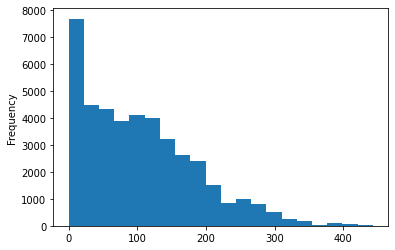

In [154]:
df_raw['lead_time'].plot.hist(bins=20)

In [155]:
df_raw['lead_time'].head(20).index

RangeIndex(start=0, stop=20, step=1)

In [156]:
df_raw['lead_time'].head(20)

0       9
1     117
2     315
3      32
4     258
5     215
6     320
7     265
8     189
9     137
10      1
11     69
12     50
13    217
14     58
15    143
16    188
17    155
18    109
19     84
Name: lead_time, dtype: int64

In [157]:
mapping_dict = dict(pd.cut(df_raw['lead_time'], 20, labels=range(20)))
mapping_dict

{0: 0,
 1: 5,
 2: 14,
 3: 1,
 4: 11,
 5: 9,
 6: 14,
 7: 11,
 8: 8,
 9: 6,
 10: 0,
 11: 3,
 12: 2,
 13: 9,
 14: 2,
 15: 6,
 16: 8,
 17: 6,
 18: 4,
 19: 3,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 8,
 25: 0,
 26: 10,
 27: 8,
 28: 8,
 29: 5,
 30: 2,
 31: 2,
 32: 14,
 33: 2,
 34: 1,
 35: 6,
 36: 3,
 37: 9,
 38: 2,
 39: 7,
 40: 1,
 41: 6,
 42: 4,
 43: 9,
 44: 6,
 45: 10,
 46: 2,
 47: 12,
 48: 1,
 49: 5,
 50: 2,
 51: 4,
 52: 1,
 53: 4,
 54: 9,
 55: 2,
 56: 2,
 57: 9,
 58: 4,
 59: 0,
 60: 4,
 61: 6,
 62: 8,
 63: 0,
 64: 7,
 65: 4,
 66: 7,
 67: 0,
 68: 6,
 69: 2,
 70: 0,
 71: 1,
 72: 1,
 73: 5,
 74: 2,
 75: 12,
 76: 2,
 77: 4,
 78: 2,
 79: 3,
 80: 5,
 81: 1,
 82: 7,
 83: 0,
 84: 2,
 85: 7,
 86: 4,
 87: 5,
 88: 0,
 89: 1,
 90: 2,
 91: 0,
 92: 4,
 93: 5,
 94: 7,
 95: 8,
 96: 6,
 97: 4,
 98: 2,
 99: 0,
 100: 0,
 101: 1,
 102: 7,
 103: 6,
 104: 2,
 105: 12,
 106: 0,
 107: 6,
 108: 7,
 109: 3,
 110: 4,
 111: 1,
 112: 1,
 113: 5,
 114: 0,
 115: 5,
 116: 10,
 117: 1,
 118: 1,
 119: 0,
 120: 1,
 121: 7,
 

In [158]:
df_raw['lead_time'] = pd.cut(df_raw['lead_time'], 15, precision=0)

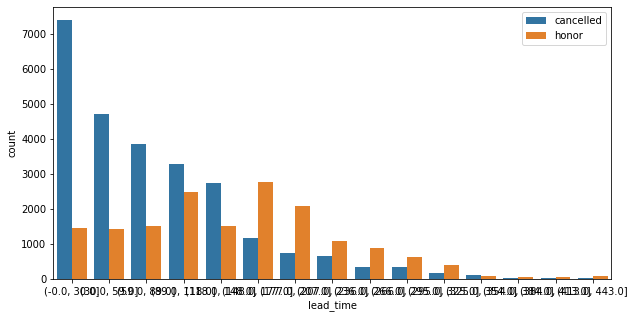

In [159]:
Sns_count_plot('lead_time')

In [161]:
df_raw.drop(df_raw[df_raw['arrival_year'] == 2017].index, axis=0, inplace=True)

In [163]:
df_raw['arrival_year'].unique()

array([2018], dtype=int64)

In [ ]:
# Ciekawe łączenie dat z Kaggle:
import calplot

train["date"] = train[["arrival_year", "arrival_month", "arrival_date"]].apply(
    lambda row: "{:02d}/{:02d}/{:d}".format(
        row.arrival_date, row.arrival_month, row.arrival_year
    ), axis=1
)
train["date"] = pd.to_datetime(train["date"], format="%d/%m/%Y", errors="coerce")
_ = calplot.calplot(
    train.groupby("date")["booking_status"].sum(), 
    vmin=0, 
    colorbar=True, 
    suptitle="Training Set - Number of Cancellations Per Day",
    suptitle_kws=dict(fontsize=20),
    cmap='YlGn'
)